In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

cars = pd.read_csv('Cars93.csv')

In [2]:
#remove extraneous columns. Drop rows with missing data

cars.drop(columns=['Unnamed: 0', 'Model', 'AirBags', 'Make'], inplace = True)

cars.dropna(inplace = True)

In [3]:
#Breakout relevant categoricals (k-1)
cars = pd.get_dummies(cars, columns=["Manufacturer","Type", "DriveTrain","Cylinders", "Man.trans.avail","Origin"], drop_first=True)

## MPG Regression

In [4]:
#Setup X (independent variables) and y (dependent variable = mpg)

X = cars.drop(columns = ['MPG.highway', 'MPG.city'])
y = cars['MPG.highway']

sc = StandardScaler()                        #scale
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)      #split test and train sets

In [5]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30))
n_neighbors = list(range(1,20))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsRegressor()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_scaled_train,y_train)

#Print The value of best Hyperparameters
best_leaf = best_model.best_estimator_.get_params()['leaf_size']
best_p = best_model.best_estimator_.get_params()['p']
best_n = best_model.best_estimator_.get_params()['n_neighbors']

print('Best leaf_size:', best_leaf)
print('Best p:', best_p)
print('Best n_neighbors:', best_n)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 12


### Tuning

In [6]:
#run KNN with best hyperparameters

regr = KNeighborsRegressor(leaf_size = best_leaf, n_neighbors = best_n, p = best_p)
regr.fit(X_scaled_train, y_train)

regr.score(X_scaled_test, y_test)

prediction = regr.predict(X_scaled_test)
predSeries = pd.Series(prediction)
y_test = y_test.reset_index(drop = 'True')

df = pd.concat([y_test, predSeries], axis=1)
df.columns = ['True','Predicted']

### Model Evaluation

In [7]:
#print true MPG values vs predicted
df

,True,Predicted
0,30,33.500000
1,26,28.666667
2,30,31.166667
3,24,28.333333
4,27,27.666667
5,22,25.583333
6,34,34.000000
7,28,29.250000
8,25,29.416667
9,26,28.166667


Text(0.5, 1.0, 'True vs Predicted MPG: leaf_size = 1, p = 1, n_neighbors = 14')

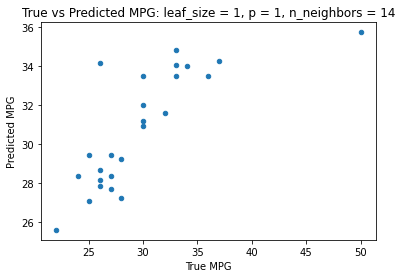

In [8]:
ax = df.plot(kind = 'scatter', x='True',y='Predicted')
ax.set_xlabel('True MPG')
ax.set_ylabel('Predicted MPG')
ax.set_title('True vs Predicted MPG: leaf_size = 1, p = 1, n_neighbors = 14')

In [9]:
regr.score(X_scaled_test, y_test)

0.5028222934472935